# Data Augmentation
## Transfer Learning
### Multi Class Classification
#### Dropout Regularization

# FIVE STEPS TO AVOID OVERFITTING

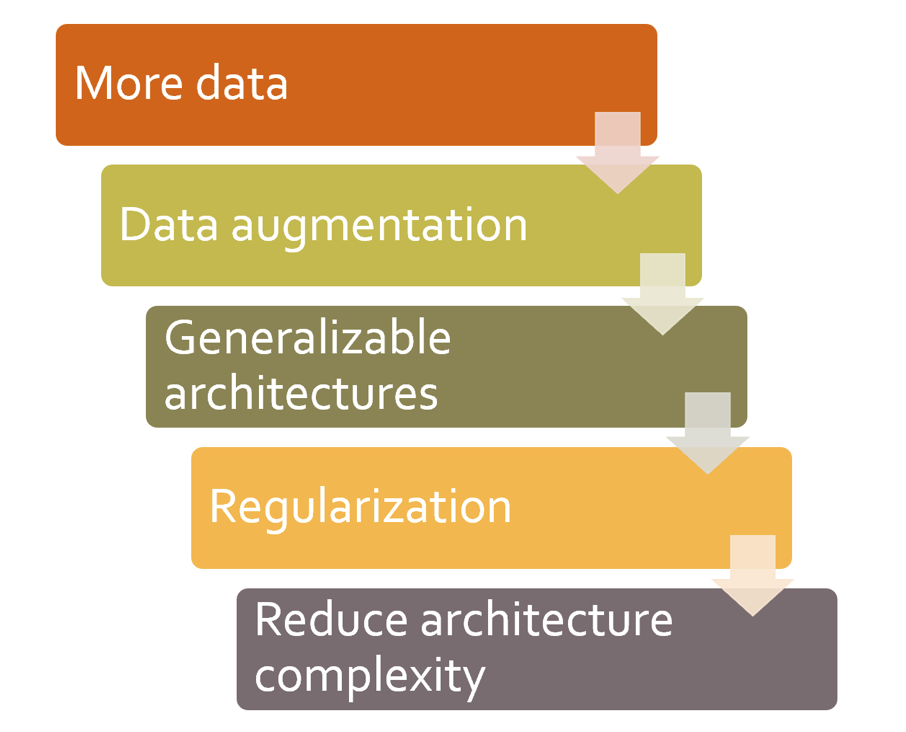

# 1. Data Augmentation - - - How it Looks 
## How to Do it using Code.
### How it effects the Netwroks Performace

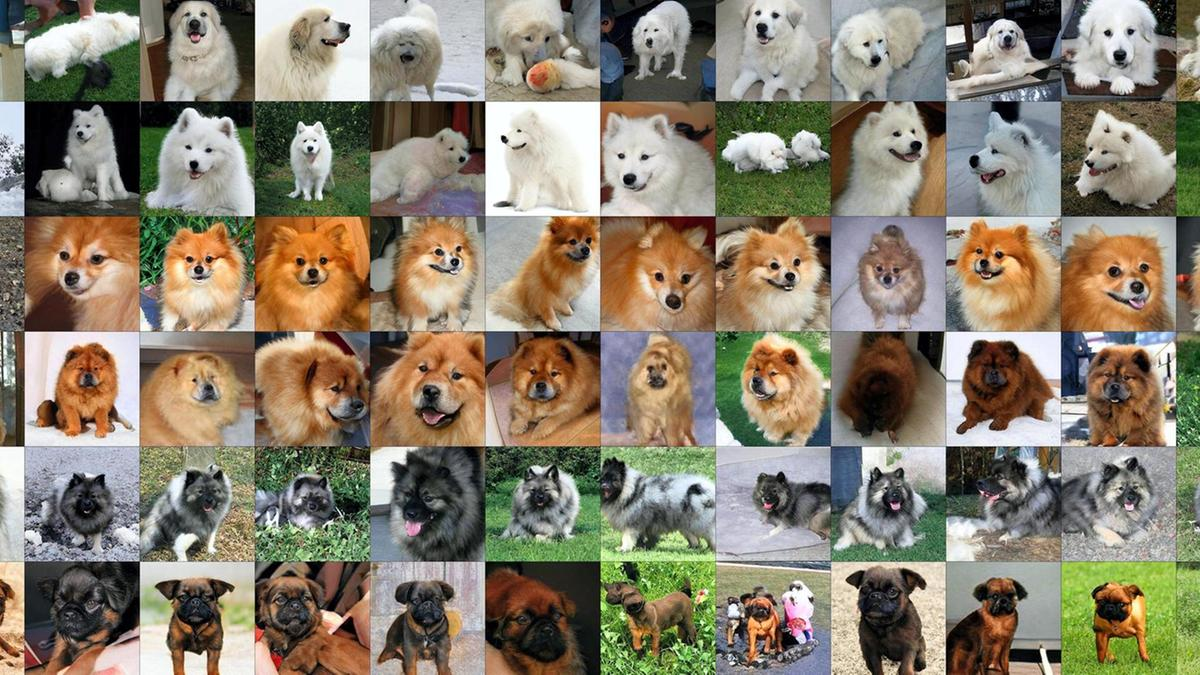

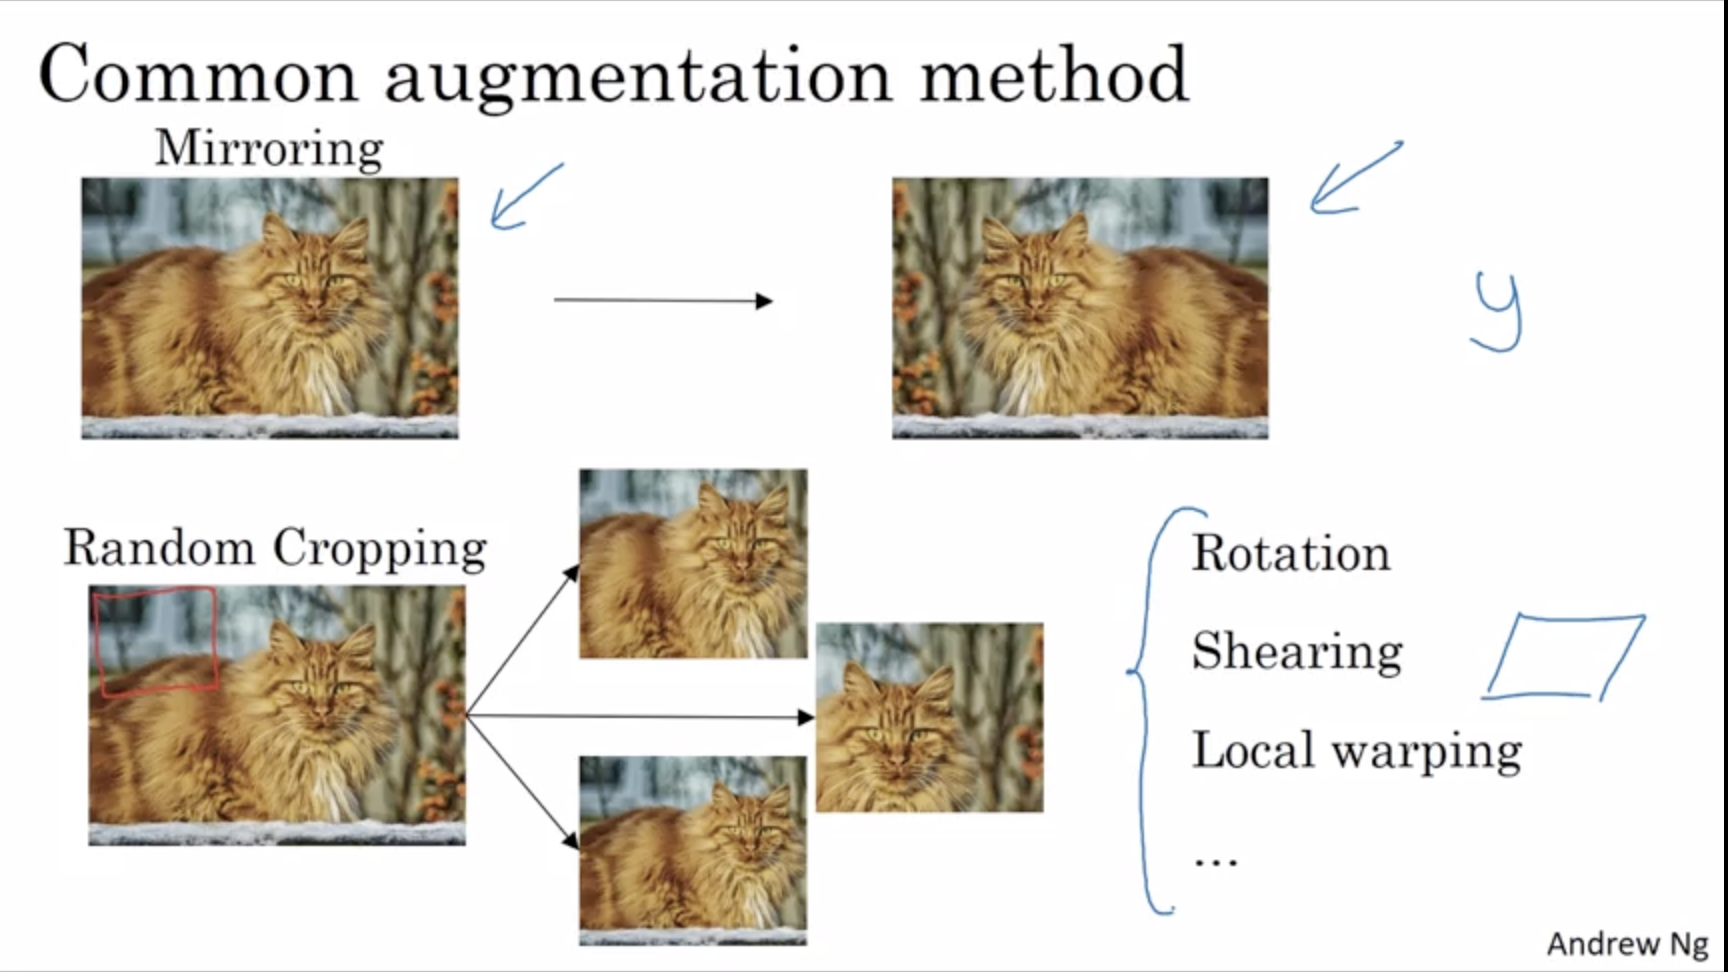

# Types of Augmentations Available in TF2.0
## 1. Flipping
## 2. Rotation
## 3. Shifting (Horizontally and Vertically)
## 4. Shearing
## 5. Zooming/Scaling
## 6. Noise
## 7. Brightness
## 8. Contrast
## 9. Color Modifications

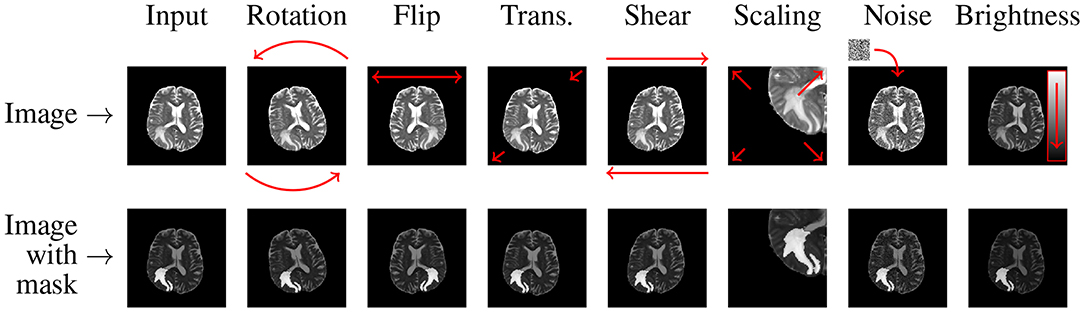

# Lets Code . ... ... . . . ... . .

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data = ImageDataGenerator(rescale = 1/255)

In [3]:
train_datagenerator = ImageDataGenerator(
                        rescale = 1./255,
                        rotation_range = 40,
                        width_shift_range = 0.2,
                        height_shift_range = 0.2,
                        shear_range = 0.2,
                        zoom_range = 0.2,
                        horizontal_flip = True,
                        fill_mode = 'nearest')

# ImageDataGenerator class in TF2.0
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [4]:
train_generator = train_datagenerator.flow_from_directory(
                    'horse-or-human/train/',
                    target_size = (300,300),
                    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


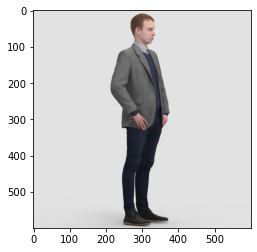

In [8]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
#img = tf.keras.preprocessing.image.load_img('horse-or-human/train/horses/horse02-8.png')
img = tensorflow.keras.preprocessing.image.load_img('Test_Images/h1.jpg')
img_array = tensorflow.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
plt.imshow(img)

In [9]:
train_datagenerator = ImageDataGenerator(
                        rotation_range = 40,
                        vertical_flip = True,
                        height_shift_range = 0.2,
                        zoom_range = 0.8,
                        width_shift_range = 0.2,
                        shear_range = 0.2,
                        horizontal_flip = True,
                        fill_mode = 'nearest')

# ImageDataGenerator.flow(
    x,
    y=None,
    batch_size=32,
    shuffle=True,
    sample_weight=None,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
)

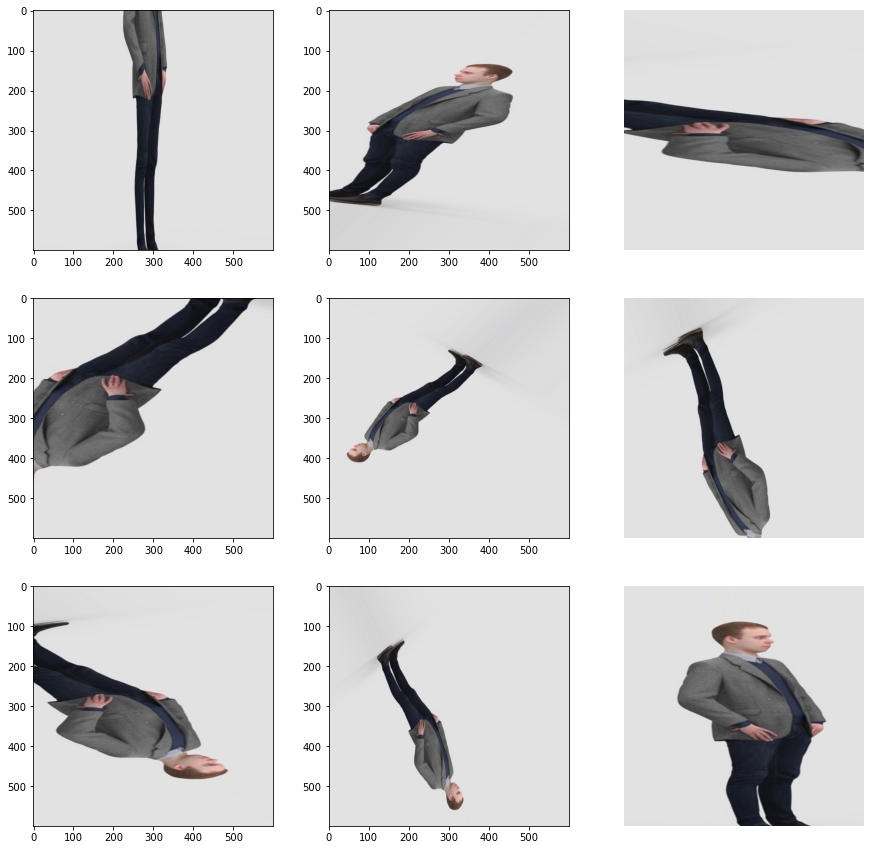

In [11]:
import matplotlib.pyplot as plt
#aug_iter = train_datagenerator.flow(img_array, batch_size = 32,save_to_dir='Augmented_Images')
aug_iter = train_datagenerator.flow(img_array, batch_size = 1)
# flow - - - >Takes data & label arrays, generates batches of augmented data.
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15))
for i in range(3):
    for j in range(3):
        image = next(aug_iter)[0].astype('uint8')
        ax[i,j].imshow(image)
    ax[i,j].axis('off')

In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3), activation ='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 147, 147, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit_generator(train_generator, epochs = 10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
33/33 [==============================] - 33s 1s/step - loss: 7.4242 - accuracy: 0.5131
Epoch 2/10
33/33 [==============================] - 33s 993ms/step - loss: 7.4242 - accuracy: 0.5131
Epoch 3/10
33/33 [==============================] - 32s 977ms/step - loss: 7.4242 - accuracy: 0.5131
Epoch 4/10
33/33 [==============================] - 33s 1s/step - loss: 7.4242 - accuracy: 0.5131
Epoch 5/10
33/33 [==============================] - 33s 990ms/step - loss: 7.4242 - accuracy: 0.5131
Epoch 6/10
33/33 [==============================] - 34s 1s/step - loss: 7.4242 - accuracy: 0.5131
Epoch 7/10
33/33 [==============================] - 34s 1s/step - loss: 7.4242 - accuracy: 0.5131
Epoch 8/10
33/33 [==============================] - 33s 990ms/step - loss: 7.4242 - accuracy: 0.5131
Epoch 9/10
33/33 [==============================] - 32s 981ms/step - loss: 7.4242 - accuracy: 0.5131
Epoch 10/10
33/33 [========

# https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

# 2. TRANSFER LEARNING

## The Idea: Say NO to Learning from Scratch(?). LFS is training the model with initializations of weights and biases. 

## Insted of learning the filters from scratch, USE A SET OF LEARNED FILTERS ON A MUCH LARGER DATASET.

# Place the Pre-Trained Network on top of the Ready to be trained netwrok and learn from the experience of 1000's of data classes.

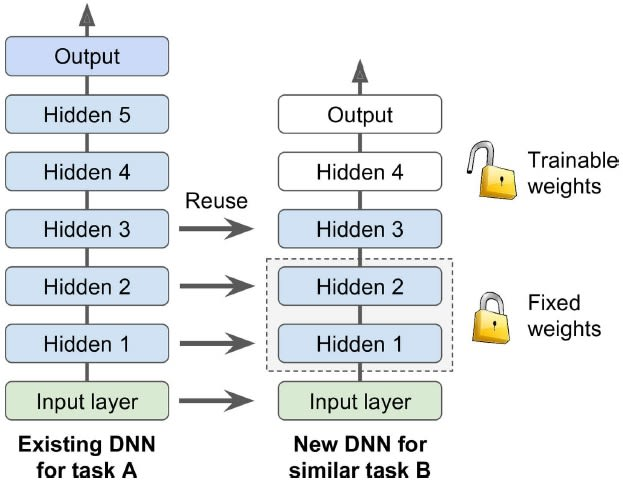

# Either Freeze(No Weight Updation During Backpropagation) or Fine Tune(Weight Updation During Backpropagation) 

# Freeze --> When Training Lables are Scarce [To avoid Overfitting]
# Fine Tuning --> When Training Lables are Plentifull ...

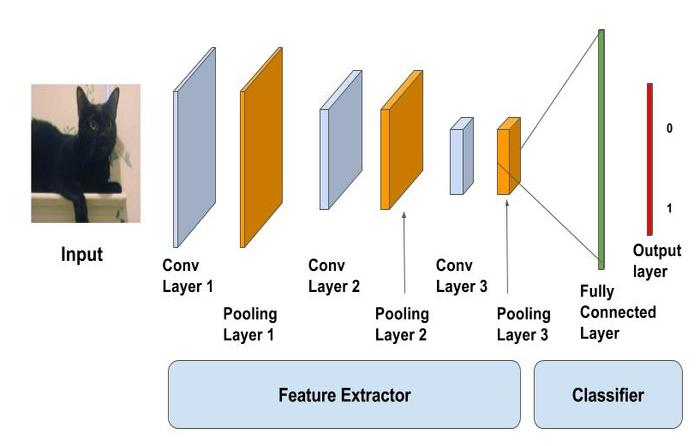

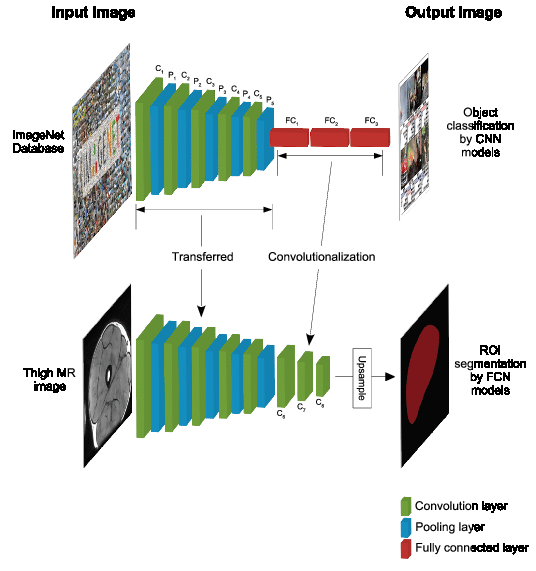

# Let's Code ... .... 

## Using InceptionV3 trained on ImageNet data (GOOGLE)

In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# https://keras.io/api/applications/

In [17]:
Pre_trained_model = InceptionV3(input_shape=(150,150,3), include_top = False, weights='imagenet')

In [19]:
#Pre_trained_model.summary()
Pre_trained_model.weights

[<tf.Variable 'conv2d_5/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-4.59105551e-01, -4.14526574e-02, -3.62577499e-03,
           -9.87672508e-02, -3.37070860e-02,  4.79929037e-02,
            2.32542142e-01,  3.23927671e-01,  5.90160079e-02,
            9.47738215e-02,  4.24996056e-02,  1.26620471e-01,
            1.33215979e-01,  1.22741833e-01, -7.92686343e-02,
            2.08227970e-02, -1.99647829e-01, -3.02687973e-01,
           -2.10659921e-01, -3.52898419e-01, -5.58023095e-01,
            3.20223093e-01,  4.53596050e-03, -3.09266411e-02,
           -6.86957911e-02,  2.00968519e-01,  1.14542745e-01,
            2.40372881e-01,  1.52943470e-02,  5.96231259e-02,
           -5.85714653e-02,  8.78173351e-01],
          [ 3.16376328e-01, -4.78494260e-03, -6.84681814e-03,
            7.44503662e-02, -1.97458476e-01,  5.20143658e-02,
           -1.24460436e-01,  3.36123914e-01,  3.01678218e-02,
           -1.26477107e-01, -1.05597451e-01, -5.31241074e-02,
          

In [20]:
#import urllib.request
#weights_url = "https://storage.googleapis.com"
#weights_file = 'inception_v3.h5'
#urllib.request.urlretrieve(weights_url, weights_file)
#Pre_trained_model.load_weights(weights_file)
Pre_trained_model.layers

# https://www.tensorflow.org/api_docs/python/tf/keras/applications/InceptionV3

In [21]:
for layer in Pre_trained_model.layers:
    layer.trainable = False

In [22]:
last_layer = Pre_trained_model.get_layer('mixed7')

In [23]:
last_layer.output_shape

(None, 7, 7, 768)

In [24]:
last_output = last_layer.output

In [25]:
last_output

<tf.Tensor 'mixed7/concat:0' shape=(None, 7, 7, 768) dtype=float32>

# What have we done: The input images theough InceptionV3 get multiplied by pre_trained filters till the last layer where the filter size is 7X7.

## Now ADD Our Dense Layer on top of this pre_trained model.

In [26]:
x = tf.keras.layers.Flatten()(last_output)

In [27]:
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)

In [28]:
x = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

In [29]:
model = tf.keras.Model(Pre_trained_model.input, x)

# Our Transfer Learning Model.

In [30]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 74, 74, 32)   96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization_2[0][0]      
_______________________________________________________________________________________

In [31]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [32]:
7*7*768

37632

In [33]:
#history = model.fit(train_generator, epochs = 10)

In [34]:
train_generator = train_datagenerator.flow_from_directory(
                    'horse-or-human/train/',
                    target_size = (150,150),
                    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [35]:
history = model.fit(train_generator, epochs = 10)

Epoch 1/10
33/33 [==============================] - 16s 484ms/step - loss: 220.4138 - acc: 0.5579
Epoch 2/10
33/33 [==============================] - 16s 479ms/step - loss: 24.5913 - acc: 0.6504
Epoch 3/10
33/33 [==============================] - 16s 487ms/step - loss: 30.6172 - acc: 0.6388
Epoch 4/10
33/33 [==============================] - 16s 491ms/step - loss: 27.3682 - acc: 0.6534
Epoch 5/10
33/33 [==============================] - 16s 489ms/step - loss: 39.6558 - acc: 0.6261
Epoch 6/10
33/33 [==============================] - 16s 489ms/step - loss: 27.7561 - acc: 0.6465
Epoch 7/10
33/33 [==============================] - 16s 497ms/step - loss: 15.2815 - acc: 0.6796
Epoch 8/10
33/33 [==============================] - 17s 510ms/step - loss: 15.2913 - acc: 0.6699
Epoch 9/10
33/33 [==============================] - 17s 502ms/step - loss: 10.5444 - acc: 0.6943
Epoch 10/10
33/33 [==============================] - 16s 487ms/step - loss: 16.2672 - acc: 0.6592


In [36]:
Y_pred = model.predict(train_generator)
Y_pred

array([[1.035732e-04],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [5.538709e-15],
       [5.137637e-01],
       [1.000000e+00]], dtype=float32)

In [37]:
xx = Y_pred>=0.5

In [38]:
y_pred = np.multiply(xx,1)

In [39]:
import numpy
unique, counts = numpy.unique(y_pred, return_counts = True)
dict(zip(unique,counts)) 

{0: 273, 1: 754}

In [40]:
A = 421/(646+381)

In [41]:
Y_pred

array([[1.035732e-04],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [5.538709e-15],
       [5.137637e-01],
       [1.000000e+00]], dtype=float32)

# To Get THe Label Information

In [42]:
train_labels = train_generator.labels
train_generator.class_indices.keys()
#imgs, labels = next(train_generator)

dict_keys(['horses', 'humans'])

# Till Now . . . . . . . . . . . Two Classes
## Now Multi Class Classification with more classes.

# Multi Class Classification Models

# What Changes fro Binary to Multi Class Classification
### Last_layer Dense from 1 Neuron to N (No. of Classes) Nurons
### Loss , From Binary_crossentropy --->>> to ---->>> categorical_crossentropy

# Let's Download the Dataset from 
http://www.laurencemoroney.com/rock-paper-scissors-dataset/   -- Just Information on data

# Actual Download:: https://www.kaggle.com/drgfreeman/rockpaperscissors

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagenerator = ImageDataGenerator(
                        rescale = 1/255.0,
                        rotation_range = 30,
                        width_shift_range = 0.2,
                        height_shift_range = 0.2,
                        shear_range = 0.2,
                        zoom_range = 0.2,
                        horizontal_flip = True,
                        vertical_flip = True,
                        fill_mode = 'nearest')
train_generator_prs = train_datagenerator.flow_from_directory(
                    'Rock_Sessors_Papers/Train/',
                    target_size = (150,150),
                    class_mode = 'categorical'
)

Found 2188 images belonging to 3 classes.


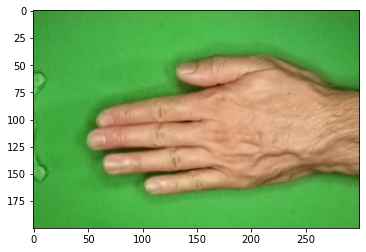

In [44]:
import numpy as np
import matplotlib.pyplot as plt
#img = tf.keras.preprocessing.image.load_img('horse-or-human/train/horses/horse02-8.png')
img = tf.keras.preprocessing.image.load_img('Rock_Sessors_Papers/Train/paper/04l5I8TqdzF9WDMJ.png')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
plt.imshow(img)

In [45]:
validation_generator_prs = train_datagenerator.flow_from_directory(
                    'Rock_Sessors_Papers/validation/',
                    target_size = (150,150),
                    class_mode = 'categorical'
)

Found 84 images belonging to 3 classes.


In [46]:
validation_generator_prs.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Lets Buid a Model

In [47]:
from tensorflow.keras.models import Sequential

In [48]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [49]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['acc'])

In [50]:
history = model.fit(train_generator_prs, epochs = 20, validation_data = validation_generator_prs)

Epoch 1/20
69/69 [==============================] - 27s 395ms/step - loss: 1.0955 - acc: 0.3620 - val_loss: 1.0925 - val_acc: 0.3929
Epoch 2/20
69/69 [==============================] - 26s 379ms/step - loss: 1.0897 - acc: 0.4159 - val_loss: 1.0874 - val_acc: 0.3929
Epoch 3/20
69/69 [==============================] - 26s 383ms/step - loss: 1.0807 - acc: 0.4333 - val_loss: 1.0790 - val_acc: 0.4048
Epoch 4/20
69/69 [==============================] - 26s 382ms/step - loss: 1.0671 - acc: 0.4698 - val_loss: 1.0534 - val_acc: 0.5119
Epoch 5/20
69/69 [==============================] - 26s 378ms/step - loss: 1.0373 - acc: 0.5192 - val_loss: 1.0366 - val_acc: 0.5357
Epoch 6/20
69/69 [==============================] - 27s 389ms/step - loss: 0.9926 - acc: 0.5507 - val_loss: 0.9986 - val_acc: 0.5833
Epoch 7/20
69/69 [==============================] - 27s 389ms/step - loss: 0.9319 - acc: 0.5823 - val_loss: 0.9426 - val_acc: 0.5476
Epoch 8/20
69/69 [==============================] - 26s 374ms/step - 

# Let's Test

In [ ]:
import os
from tensorflow.keras.preprocessing import image
x1 = []
path = 'Rock_Sessors_Papers/Test'
img_list = os.listdir(path)
for img in img_list:
    img_test = image.load_img(path+'/'+img, target_size=(150,150))
    x = image.img_to_array(img_test)
    x = np.expand_dims(x, axis=0)
    x1.append(x)
x11 = np.array(x1)
# Select an image to test
i = 50
img_show = image.load_img(path+'/'+img_list[i])
plt.imshow(img_show)
image_tensor = np.vstack([x11[i]])
classes = model.predict(image_tensor)
print(classes)

# Paper, Rock, Scessors - - - O/P in alphabedical Order.

In [ ]:
x11.shape

# 4. Dropout Regularization  --- Why? To Avoid Overfitting.
## Overfitting means that the network may become too speacilized in a particular type of input data and fare poorly with others.

### What's The Impact....

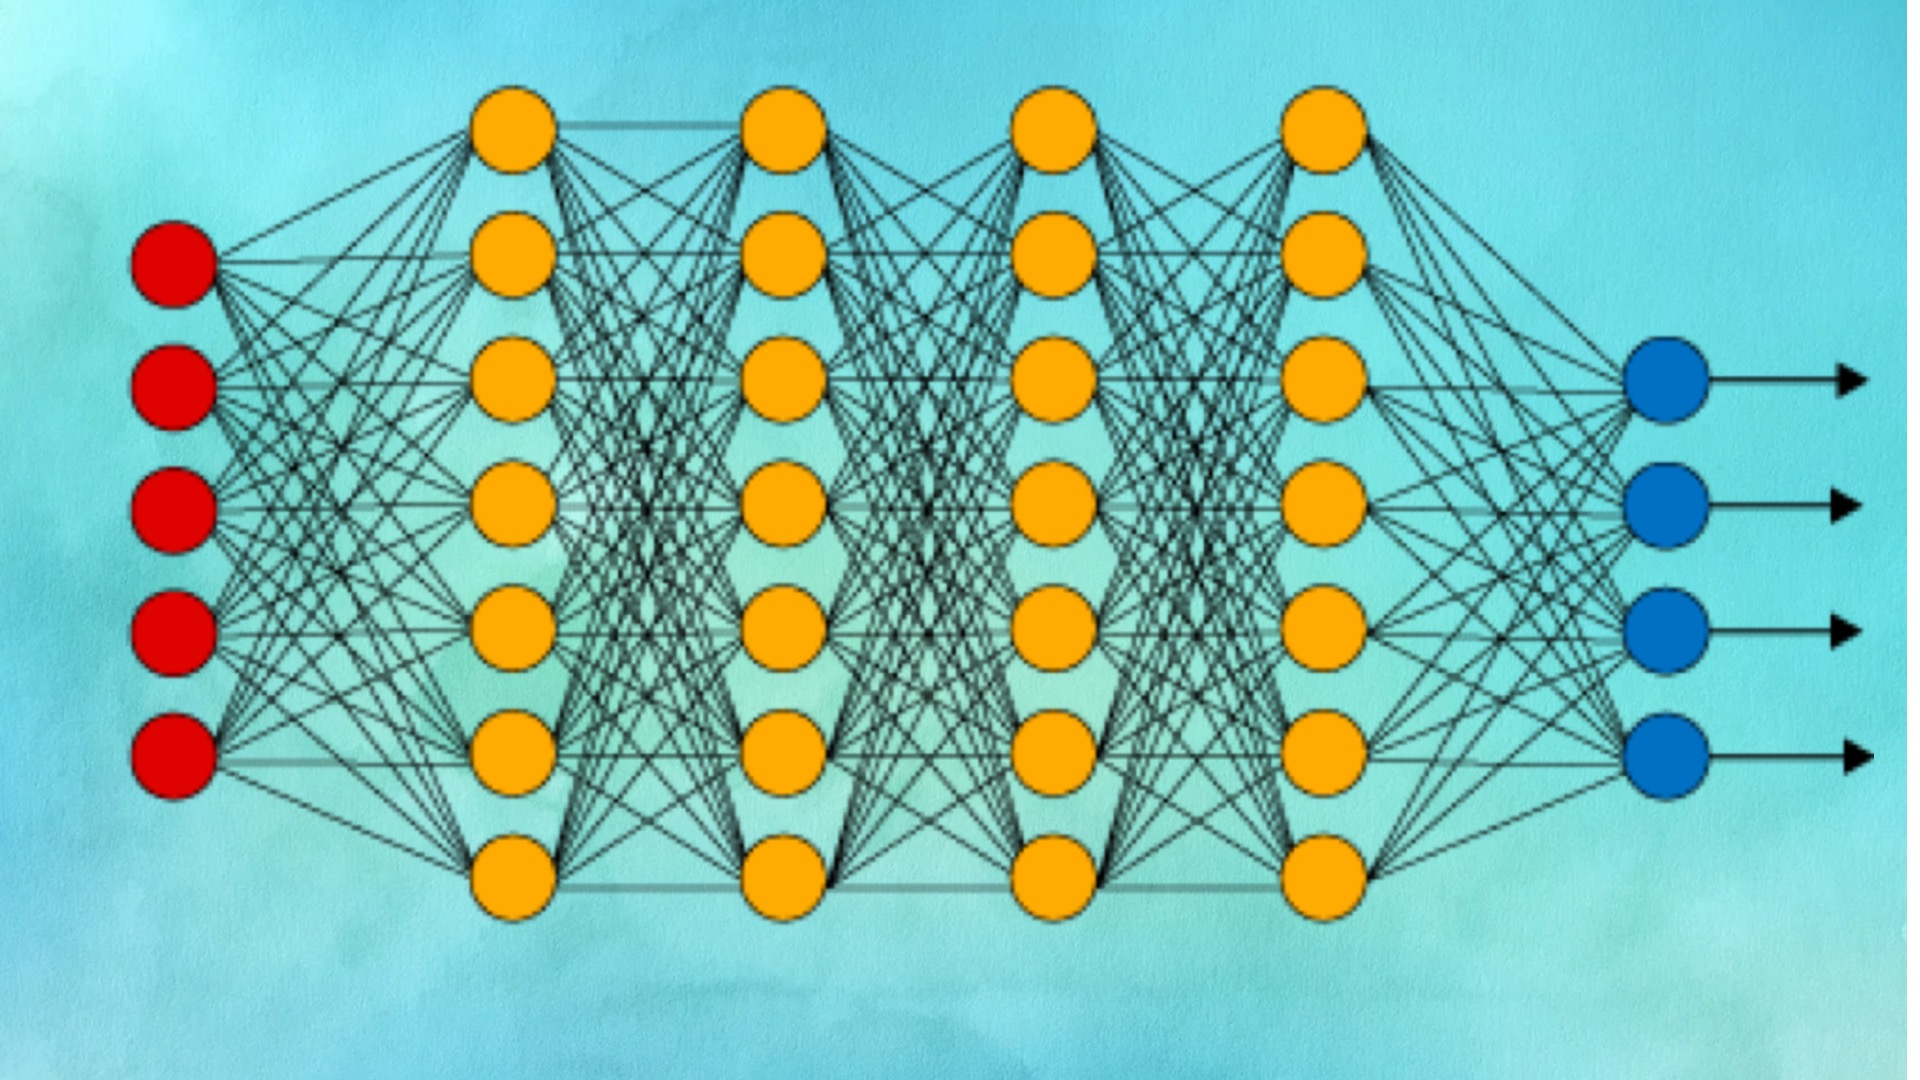

# Each Neuron impacts the outcome of many other neurons. If at some point in time, if a neuron becomes over biased towards a particular class of inputs, the corresponding neurons in the downstream layers also gets affected making the process of training "OVERFITTING". In the process the neighbouring neurons can adopt similar weights and biases as the overspecified neuron making the overall model to become overspecified.

# The Solution - - - Rmove or Through the trouble maker out. How to identify the trouble making neurons? 

### We can't identify. So Remove randomly some neurons from the intermediate layers.

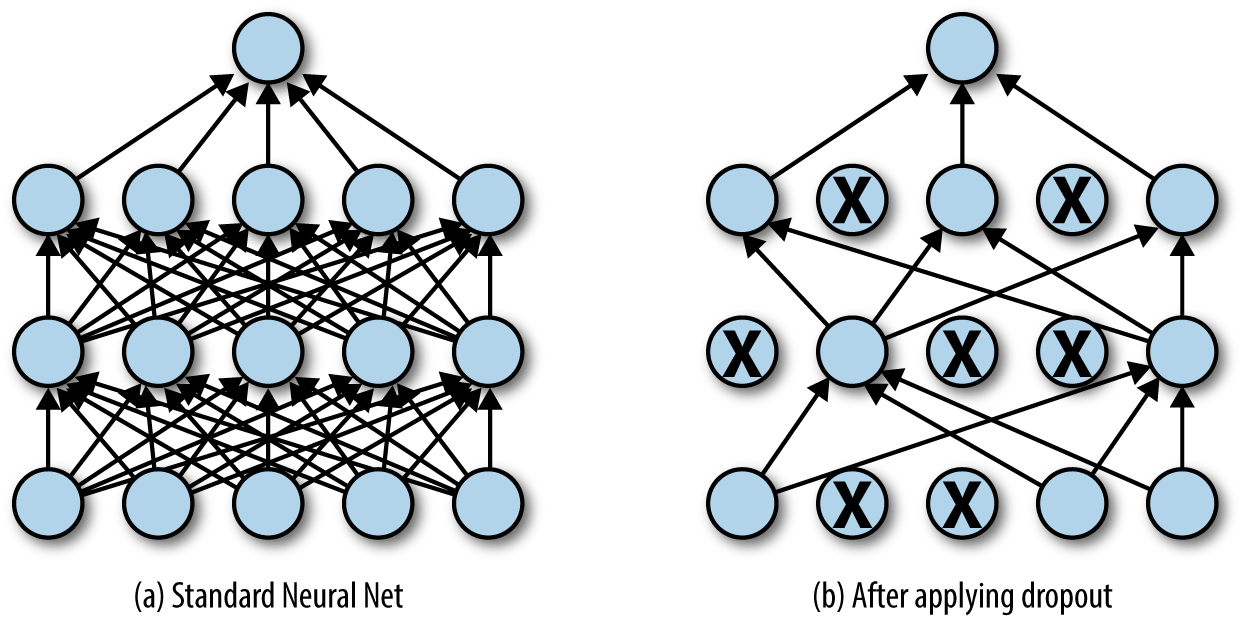

# How to deactivate the neurons - - - - - - DROPOUT

In [ ]:
tf.keras.layers.Dropout(0.1)

# Dropout is only in the dense layers

In [ ]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(train_generator_prs, epochs = 20, validation_data = validation_generator_prs)